In [1]:
import pickle
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pylab as plt
import os 
import warnings
import seaborn as sns
import random as rn
import matplotlib
import scATAcat
warnings.filterwarnings('ignore')

#### define necessary parameters

In [2]:
# set the seed for reproducibility
sd = 1234
np.random.seed(sd)
rn.seed(sd)
%env PYTHONHASHSEED=0


env: PYTHONHASHSEED=0


#### define necessary parameters

In [3]:
warnings.filterwarnings('ignore')

figures_dir = "../../../results/Fig5_SFig3-NeurIPS_BM_scmultiome/Fig5_SFig3-apply_marker_based_annotation/figures/"
data_dir = "../../../results/Fig5_SFig3-NeurIPS_BM_scmultiome/"

if not os.path.exists(figures_dir):
    os.mkdir(figures_dir)


#### import scanpy object

In [4]:
sc_commonDiffFeatures_adata= pickle.load(open(data_dir +'Fig5_SFig3-apply_scATAcat/outputs/sc_commonDiffFeatures_adata.pkl','rb'))


In [5]:

bm_atac_activity_matrix = pd.read_csv(data_dir + "Fig5-apply_seurat_label_transfer/bm_neurips_atac_gene_activity_matrix.csv", index_col=0)
bm_atac_activity_matrix.head()


AAACAGCCAATTAAGG-1  AAACAGCCAGGCTGTT-1  AAACATGCAAAGCGCA-1  \
PLCXD1                    1                   0                   0   
GTPBP6                    0                   2                   0   
PPP2R3B                   1                   2                   4   
SHOX                      0                   0                   0   
CRLF2                     0                   1                   1   

         AAACATGCAATAACCT-1  AAACATGCAATAATGG-1  AAACATGCAATATAGG-1  \
PLCXD1                    1                   1                   2   
GTPBP6                    0                   3                   3   
PPP2R3B                   3                   0                   0   
SHOX                      0                   0                   0   
CRLF2                     0                   0                   0   

         AAACATGCACTAAGTT-1  AAACATGCAGTATGTT-1  AAACATGCATAATGAG-1  \
PLCXD1                    0                   0                   0   
GTPBP6                    2                   0                   0   
PPP2R3B                   1                   0                   1   
SHOX                      0                   0                   0   
CRLF2                     1                   0                   0   

         AAACCAACAATTAACC-1  ...  TTTGTGGCACAATGTT-1  TTTGTGGCACTGACCG-1  \
PLCXD1                    0  ...                   1                   1   
GTPBP6                    1  ...                   0                   2   
PPP2R3B                   3  ...                   2                   1   
SHOX                      0  ...                   0                   0   
CRLF2                     0  ...                   0                   1   

         TTTGTGGCAGCATTAT-1  TTTGTGGCATCCGTAA-1  TTTGTGTTCATGTGGT-1  \
PLCXD1                    1                   2                   0   
GTPBP6                    0                   5                   0   
PPP2R3B                   0                   8                   0   
SHOX                      0                   0                   0   
CRLF2                     0                   2                   0   

         TTTGTGTTCATTTGCT-1  TTTGTGTTCGACCTGA-1  TTTGTGTTCGCCTAAG-1  \
PLCXD1                    1                   2                   0   
GTPBP6                    0                   5                   0   
PPP2R3B                   2                   6                   1   
SHOX                      0                   1                   0   
CRLF2                     0                   0                   0   

         TTTGTTGGTACGGTAC-1  TTTGTTGGTTCGGTAA-1  
PLCXD1                    0                   0  
GTPBP6                    0                   0  
PPP2R3B                   0                   2  
SHOX                      0                   0  
CRLF2                     0                   1  

[5 rows x 7238 columns]

### scATAcat includes less cells than of ground-truth. Subset both the datasets to common cells:

In [6]:
bm_atac_activity_matrix = bm_atac_activity_matrix.loc[:,list(set(sc_commonDiffFeatures_adata.obs.index) & set(bm_atac_activity_matrix.columns))]

In [7]:
sc_commonDiffFeatures_adata = sc_commonDiffFeatures_adata[list(set(sc_commonDiffFeatures_adata.obs.index) & set(bm_atac_activity_matrix.columns)),]

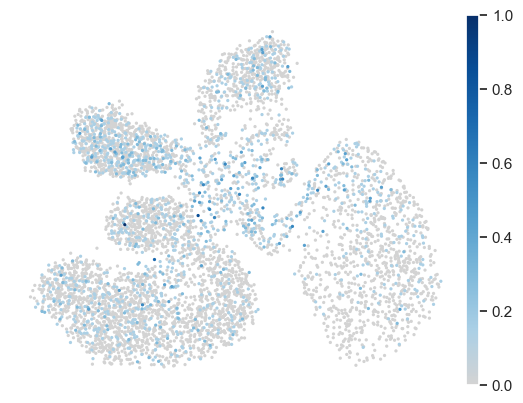

In [8]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="CD19", 
                           activity_matrix=bm_atac_activity_matrix,
                           out_path=figures_dir+ "CD19_gene_act_B_marker.pdf",
                           cmap = None)
plt.show()

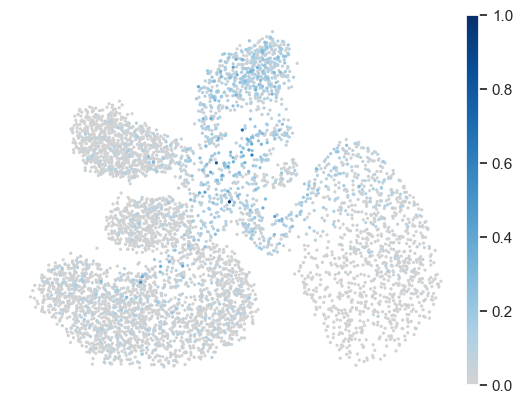

In [9]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="PAX5", 
                           activity_matrix=bm_atac_activity_matrix,
                           out_path=figures_dir+"/PAX5_gene_act_B_marker.pdf",
                           cmap= None)
plt.show()

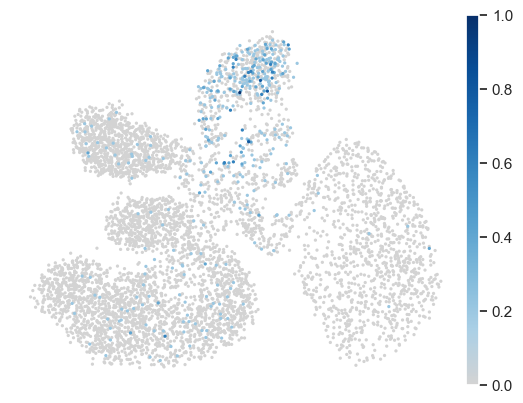

In [10]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="MS4A1", 
                           activity_matrix=bm_atac_activity_matrix,
                           out_path=figures_dir+"/MS4A1_gene_act_B_marker.pdf",
                           cmap= None)
plt.show()

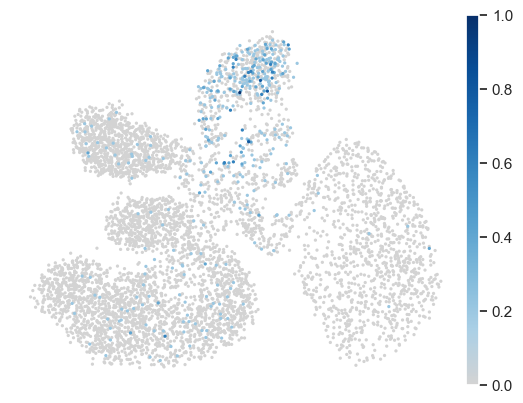

In [11]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="MS4A1", 
                           activity_matrix=bm_atac_activity_matrix,
                           out_path=figures_dir+"/MS4A1_gene_act_B_marker.png",
                           cmap= None)
plt.show()

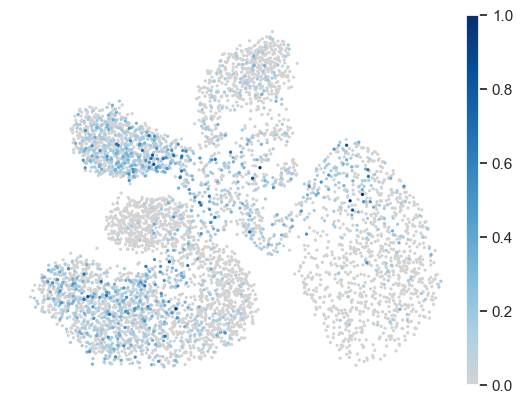

In [12]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="CD4", 
                           activity_matrix=bm_atac_activity_matrix,
                           out_path=figures_dir+"/CD4_gene_act_CD4T_marker.pdf",
                           cmap= None)
plt.show()

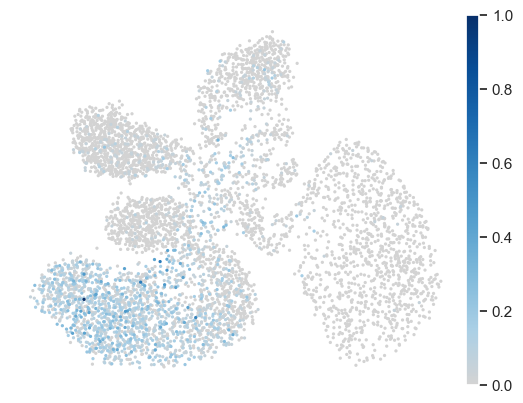

In [13]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="IL7R", 
                           activity_matrix=bm_atac_activity_matrix,
                           out_path=figures_dir+"/IL7R_gene_act_CD4T_marker.pdf",
                           cmap= None)
plt.show()

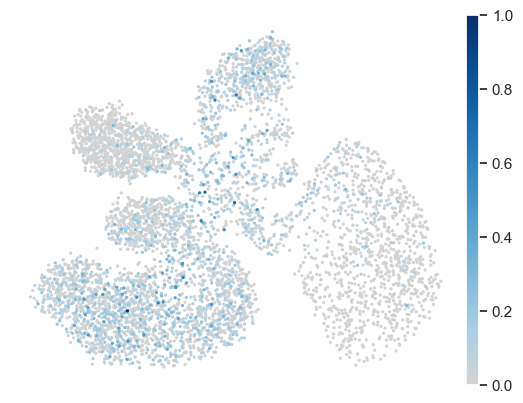

In [14]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="CCR7", 
                           activity_matrix=bm_atac_activity_matrix,
                           out_path=figures_dir+"/CCR7_gene_act_CD4T_marker.pdf",
                           cmap= None)
plt.show()

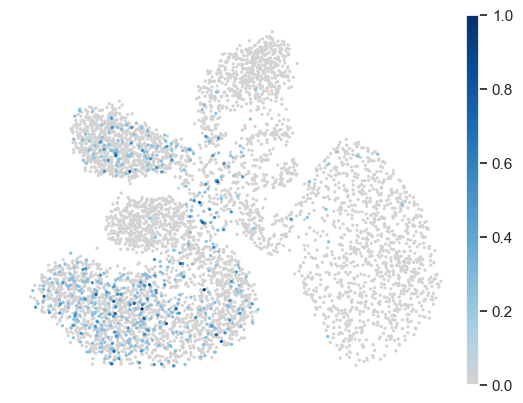

In [15]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="CTLA4", 
                           activity_matrix=bm_atac_activity_matrix,
                           out_path=figures_dir+"/CTLA4_gene_act_CD4T_marker.pdf",
                           cmap= None)
plt.show()

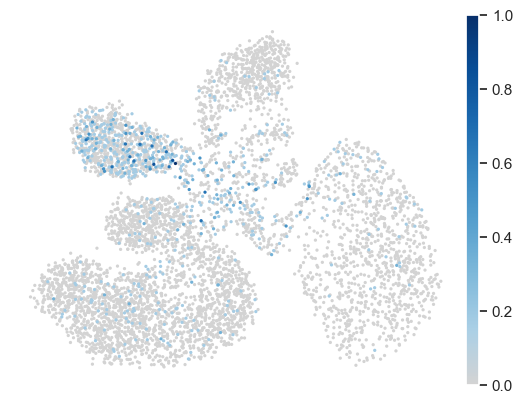

In [16]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="MPO", 
                           activity_matrix=bm_atac_activity_matrix,
                           out_path=figures_dir+"/MPO_gene_act_Mono_marker.pdf",
                           cmap= None)
plt.show()

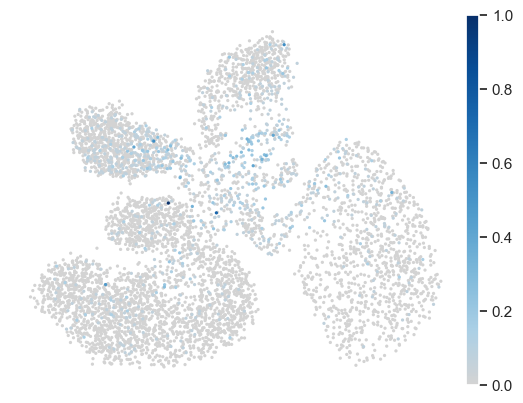

In [17]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="MME", 
                           activity_matrix=bm_atac_activity_matrix,
                           out_path=figures_dir+"/MME_gene_act_CLP_marker.pdf",
                           cmap= None)
plt.show()

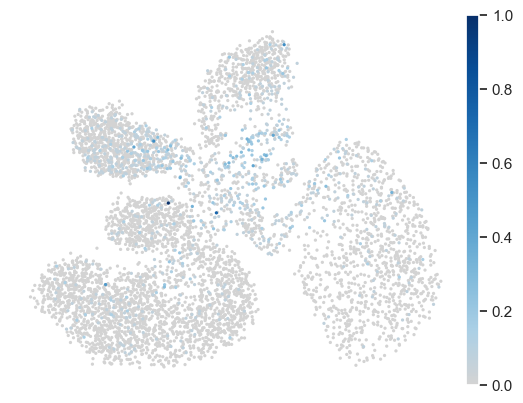

In [18]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="MME", 
                           activity_matrix=bm_atac_activity_matrix,
                           out_path=figures_dir+"/MME_gene_act_CLP_marker.png",
                           cmap= None)
plt.show()

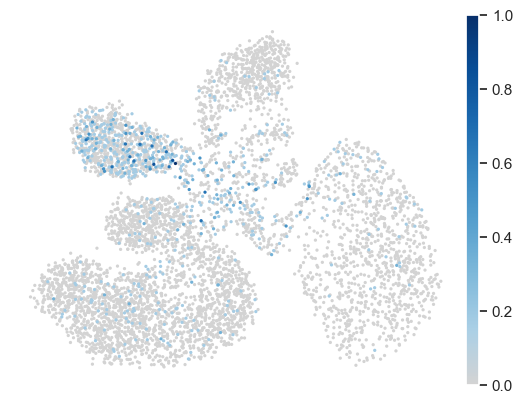

In [19]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="MPO", 
                           activity_matrix=bm_atac_activity_matrix,
                           out_path=figures_dir+"/MPO_gene_act_CLP_marker.pdf",
                           cmap= None)
plt.show()

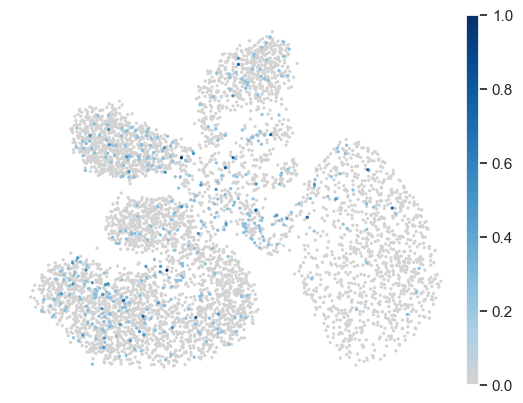

In [20]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="AVP", 
                           activity_matrix=bm_atac_activity_matrix,
                           out_path=figures_dir+"/AVP_gene_act_HSC_marker.pdf",
                           cmap= None)
plt.show()

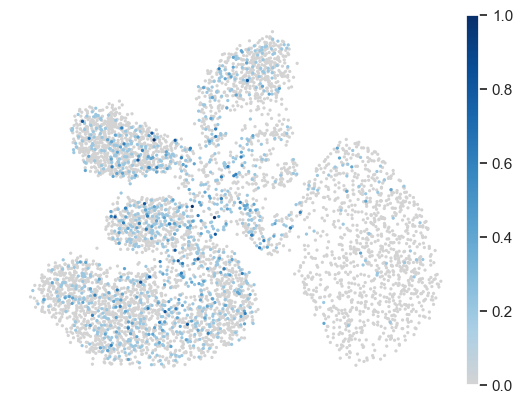

In [21]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="HOPX", 
                           activity_matrix=bm_atac_activity_matrix,
                           out_path=figures_dir+"/HOPX_gene_act_HSC_marker.pdf",
                           cmap= None)
plt.show()

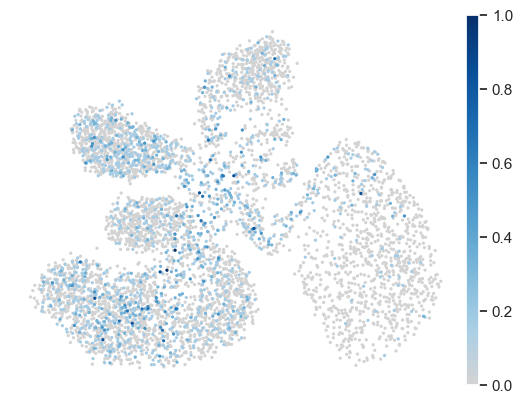

In [22]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="ZNF467", 
                           activity_matrix=bm_atac_activity_matrix,
                           out_path=figures_dir+"/ZNF467_gene_act_HSC_MPP_marker.pdf",
                           cmap= None)
plt.show()

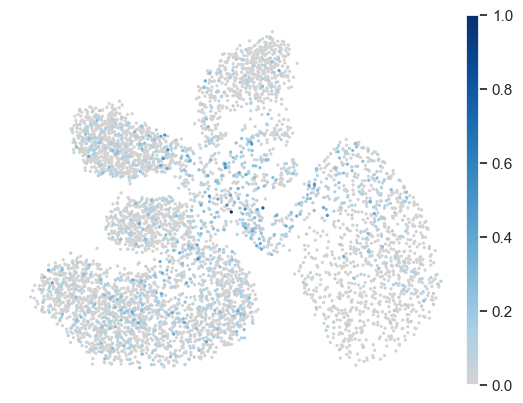

In [23]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="CD34", 
                           activity_matrix=bm_atac_activity_matrix,
                           out_path=figures_dir+"/CD34_gene_act_HSC_marker.pdf",
                           cmap= None)
plt.show()

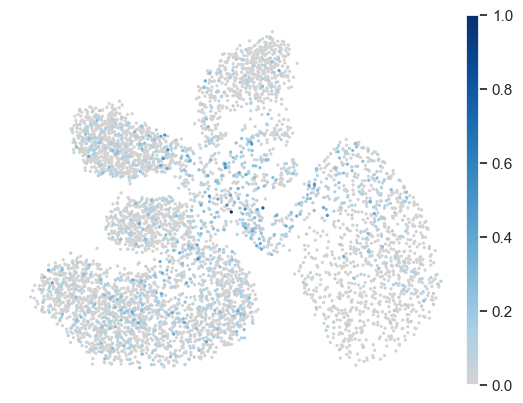

In [24]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="CD34", 
                           activity_matrix=bm_atac_activity_matrix,
                           out_path=figures_dir+"/CD34_gene_act_HSC_marker.pdf",
                           cmap= None)
plt.show()

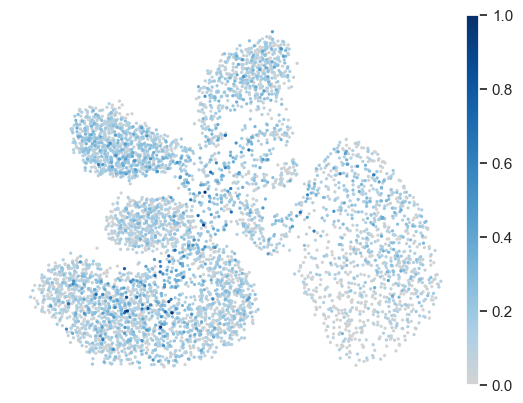

In [25]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="DUSP1", 
                           activity_matrix=bm_atac_activity_matrix,
                           out_path=figures_dir+"/DUSP1_gene_act_HSC_marker.pdf",
                           cmap= None)
plt.show()

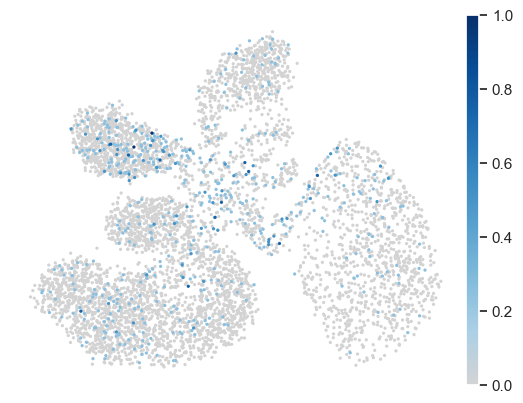

In [26]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="CSF3R", 
                           activity_matrix=bm_atac_activity_matrix,
                           out_path=figures_dir+"/CSF3R_gene_act_CMP_marker.pdf",
                           cmap= None)
plt.show()

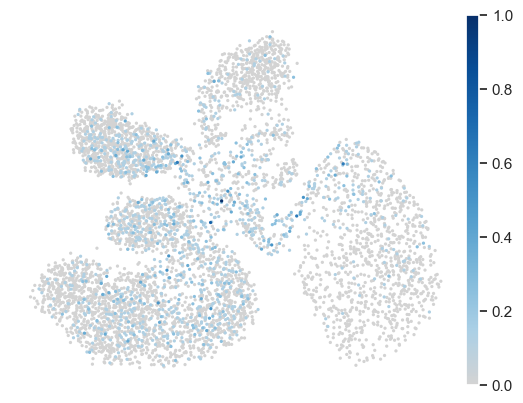

In [27]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="HDC", 
                           activity_matrix=bm_atac_activity_matrix,
                           out_path=figures_dir+"/HDC_gene_act_CMP_marker.pdf",
                           cmap= None)
plt.show()

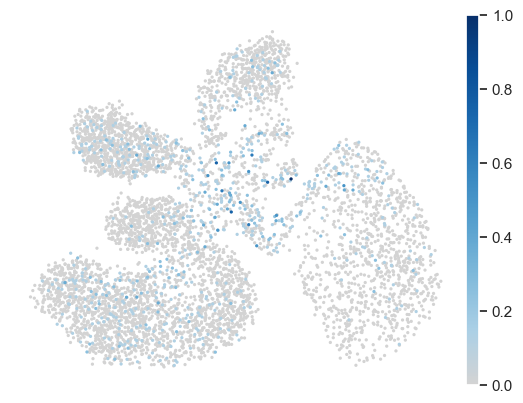

In [28]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="NAT8L", 
                           activity_matrix=bm_atac_activity_matrix,
                           out_path=figures_dir+"/NAT8L_gene_act_CMP_marker.pdf",
                           cmap= None)
plt.show()

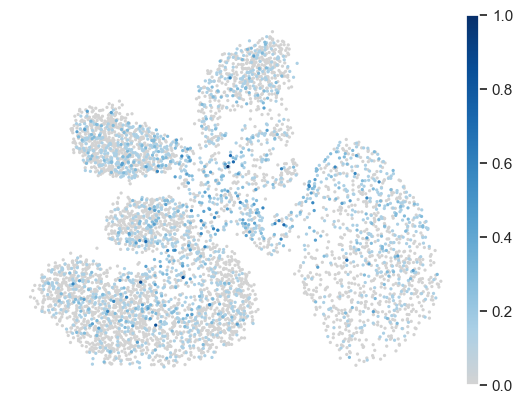

In [29]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="ZNF20", 
                           activity_matrix=bm_atac_activity_matrix,
                           out_path=figures_dir+"/ZNF20_gene_act_CMP_marker.pdf",
                           cmap= None)
plt.show()

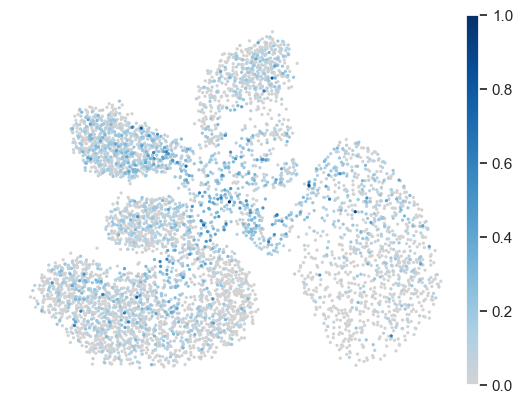

In [30]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="NRIP1", 
                           activity_matrix=bm_atac_activity_matrix,
                           out_path=figures_dir+"/NRIP1_gene_act_HSC_marker.pdf",
                           cmap= None)
plt.show()

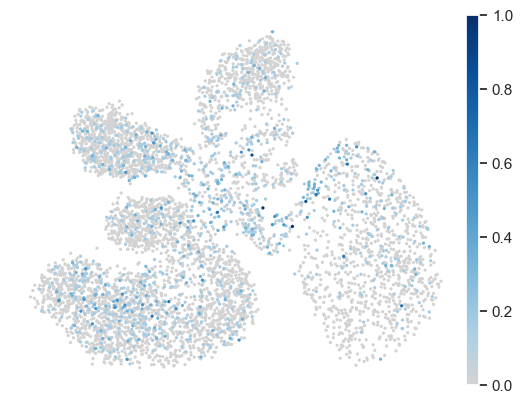

In [31]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="MMEL1", 
                           activity_matrix=bm_atac_activity_matrix,
                           out_path=figures_dir+"/MMEL1_gene_act_CMP_marker.pdf",
                           cmap= None)
plt.show()

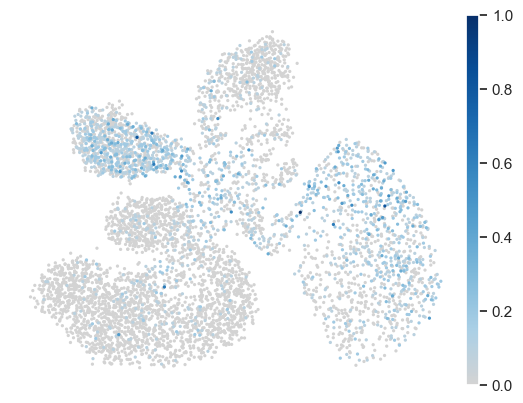

In [32]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="TGM2", 
                           activity_matrix=bm_atac_activity_matrix,
                           out_path=figures_dir+"/TGM2_gene_act_CMP_marker.pdf",
                           cmap= None)
plt.show()

In [33]:
sc_commonDiffFeatures_adata

AnnData object with n_obs × n_vars = 5766 × 31315
    obs: 'cell_IDs', 'leiden_1.0', 'num_feature_per_cell_', 'CD19', 'PAX5', 'MS4A1', 'CD4', 'IL7R', 'CCR7', 'CTLA4', 'MPO', 'MME', 'AVP', 'HOPX', 'ZNF467', 'CD34', 'DUSP1', 'CSF3R', 'HDC', 'NAT8L', 'ZNF20', 'NRIP1', 'MMEL1', 'TGM2'
    var: 'cCREs'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'leiden_1.0_colors'
    obsm: 'num_feature_per_cell', 'X_pca', 'X_umap'
    varm: 'num_cell_per_feature', 'PCs'
    layers: 'binary', 'TF_logIDF'
    obsp: 'distances', 'connectivities'

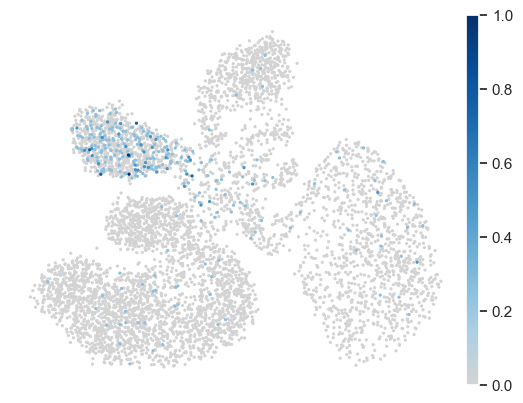

In [34]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="LYZ", 
                           activity_matrix=bm_atac_activity_matrix,
                           out_path=figures_dir+"/LYZ_gene_act_Mono_marker.pdf",
                           cmap= None)
plt.show()

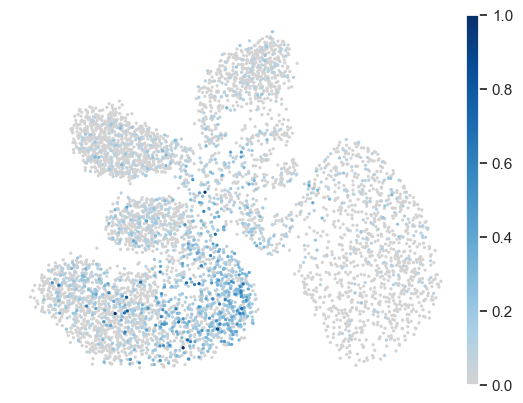

In [35]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="CD8A", 
                           activity_matrix=bm_atac_activity_matrix,
                           out_path=figures_dir+"/CD8A_gene_act_CD8T_marker.pdf",
                           cmap= None)
plt.show()

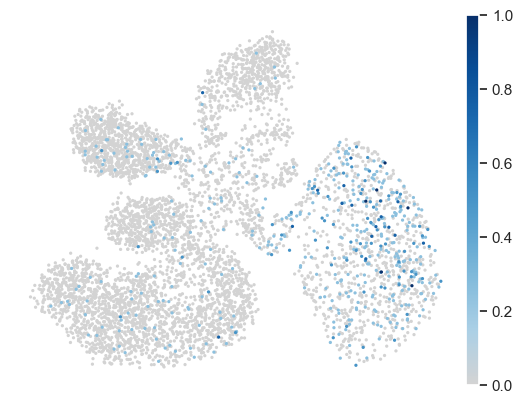

In [36]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="GATA1", 
                           activity_matrix=bm_atac_activity_matrix,
                           out_path=figures_dir+"/GATA1_gene_act_Ery_marker.pdf",
                           cmap= None)
plt.show()

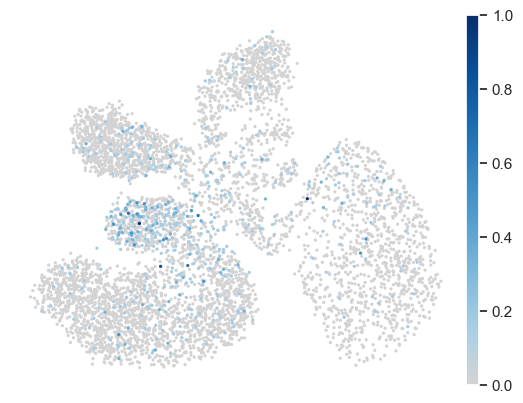

In [37]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="GNLY", 
                           activity_matrix=bm_atac_activity_matrix,
                           out_path=figures_dir+"/GNLY_gene_act_NKcell_marker.pdf",
                           cmap= None)
plt.show()

### UMAP embedding colored by groudn-truth cell-type identities

In [38]:
NeurIPS_BM_s1d1_metadata = pd.read_csv("../../../data/NeurIPS_BM_scmultiome/03_cell_IDs/NeurIPS_BM_s1d1_metadata.csv", index_col=0)

In [39]:
NeurIPS_BM_s1d1_metadata["cellIDs"] = NeurIPS_BM_s1d1_metadata.index.str.split("-").str[:-1].str.join('-')

In [40]:
NeurIPS_BM_s1d1_metadata[["cellIDs", "cell_type"]]

cellIDs         cell_type
TAGTTGTCACCCTCAC-1-s1d1  TAGTTGTCACCCTCAC-1     Naive CD20+ B
CTATGGCCATAACGGG-1-s1d1  CTATGGCCATAACGGG-1        CD14+ Mono
CCGCACACAGGTTAAA-1-s1d1  CCGCACACAGGTTAAA-1            CD8+ T
TCATTTGGTAATGGAA-1-s1d1  TCATTTGGTAATGGAA-1            CD8+ T
ACCACATAGGTGTCCA-1-s1d1  ACCACATAGGTGTCCA-1        CD16+ Mono
...                                     ...               ...
AGACCCGGTTATCCTA-1-s1d1  AGACCCGGTTATCCTA-1  CD4+ T activated
GACCTAAGTGCCTCAC-1-s1d1  GACCTAAGTGCCTCAC-1               pDC
AGCTCATAGCTATATG-1-s1d1  AGCTCATAGCTATATG-1  CD4+ T activated
TACGTACAGGAAACTG-1-s1d1  TACGTACAGGAAACTG-1      CD4+ T naive
GGTTTCTGTTTATCTG-1-s1d1  GGTTTCTGTTTATCTG-1            CD8+ T

[6224 rows x 2 columns]

In [41]:
NeurIPS_BM_s1d1_metadata.index = NeurIPS_BM_s1d1_metadata.cellIDs

In [42]:
NeurIPS_BM_s1d1_metadata = NeurIPS_BM_s1d1_metadata[["cellIDs", "cell_type"]]

In [43]:
NeurIPS_ann_rename_dict = {'B1 B': 'Bcell',
 'CD14+ Mono': 'Mono',
 'CD16+ Mono': 'Mono',
 'CD4+ T activated':"CD4Tcell",
 'CD4+ T naive':"CD4Tcell",
 'CD8+ T':"CD8Tcell",
 'Erythroblast':"Ery",
 'G/M prog':"GMP",
 'HSC':"HSC",
 'ID2-hi myeloid prog':"CMP",
 'ILC':"ILC",
 'Lymph prog':"CLP",
 'MK/E prog':"MEP",
 'NK':"NKcell",
 'Naive CD20+ B':"Bcell",
 'Normoblast':"Ery", #
 'Plasma cell':"Plasma cell",
 'Proerythroblast':"Ery",
 'Transitional B':"Bcell",
 'cDC2':"cDC2",
 'pDC':'pDC'}

In [44]:
NeurIPS_BM_s1d1_metadata['NeurIPS_ann_simp'] =list(NeurIPS_BM_s1d1_metadata["cell_type"].map(NeurIPS_ann_rename_dict))
NeurIPS_BM_s1d1_metadata.index.name = None
NeurIPS_BM_s1d1_metadata.columns=["cell_IDs", "ground_truth_annotations","ground_truth_annotations_simplified" ]
NeurIPS_BM_s1d1_metadata

cell_IDs ground_truth_annotations  \
TAGTTGTCACCCTCAC-1  TAGTTGTCACCCTCAC-1            Naive CD20+ B   
CTATGGCCATAACGGG-1  CTATGGCCATAACGGG-1               CD14+ Mono   
CCGCACACAGGTTAAA-1  CCGCACACAGGTTAAA-1                   CD8+ T   
TCATTTGGTAATGGAA-1  TCATTTGGTAATGGAA-1                   CD8+ T   
ACCACATAGGTGTCCA-1  ACCACATAGGTGTCCA-1               CD16+ Mono   
...                                ...                      ...   
AGACCCGGTTATCCTA-1  AGACCCGGTTATCCTA-1         CD4+ T activated   
GACCTAAGTGCCTCAC-1  GACCTAAGTGCCTCAC-1                      pDC   
AGCTCATAGCTATATG-1  AGCTCATAGCTATATG-1         CD4+ T activated   
TACGTACAGGAAACTG-1  TACGTACAGGAAACTG-1             CD4+ T naive   
GGTTTCTGTTTATCTG-1  GGTTTCTGTTTATCTG-1                   CD8+ T   

                   ground_truth_annotations_simplified  
TAGTTGTCACCCTCAC-1                               Bcell  
CTATGGCCATAACGGG-1                                Mono  
CCGCACACAGGTTAAA-1                            CD8Tcell  
TCATTTGGTAATGGAA-1                            CD8Tcell  
ACCACATAGGTGTCCA-1                                Mono  
...                                                ...  
AGACCCGGTTATCCTA-1                            CD4Tcell  
GACCTAAGTGCCTCAC-1                                 pDC  
AGCTCATAGCTATATG-1                            CD4Tcell  
TACGTACAGGAAACTG-1                            CD4Tcell  
GGTTTCTGTTTATCTG-1                            CD8Tcell  

[6224 rows x 3 columns]

In [45]:
# subset the cells to common cells
NeurIPS_BM_s1d1_metadata = NeurIPS_BM_s1d1_metadata.loc[sc_commonDiffFeatures_adata.obs.index]
NeurIPS_BM_s1d1_metadata.index.name = None

In [46]:
NeurIPS_BM_s1d1_metadata.head()

cell_IDs ground_truth_annotations  \
TTGCACACACAATACT-1  TTGCACACACAATACT-1                   CD8+ T   
GGTCAGGAGAAGGTGC-1  GGTCAGGAGAAGGTGC-1                      pDC   
CTTACTAGTTAGCAGC-1  CTTACTAGTTAGCAGC-1                   CD8+ T   
AAACCGCGTAAGCACC-1  AAACCGCGTAAGCACC-1         CD4+ T activated   
TATTAGCCATTGTGAT-1  TATTAGCCATTGTGAT-1               CD14+ Mono   

                   ground_truth_annotations_simplified  
TTGCACACACAATACT-1                            CD8Tcell  
GGTCAGGAGAAGGTGC-1                                 pDC  
CTTACTAGTTAGCAGC-1                            CD8Tcell  
AAACCGCGTAAGCACC-1                            CD4Tcell  
TATTAGCCATTGTGAT-1                                Mono

In [47]:
sc_commonDiffFeatures_adata.obs

cell_IDs leiden_1.0  num_feature_per_cell_  \
cell_IDs                                                                   
TTGCACACACAATACT-1  TTGCACACACAATACT-1          2                 4788.0   
GGTCAGGAGAAGGTGC-1  GGTCAGGAGAAGGTGC-1          9                 9613.0   
CTTACTAGTTAGCAGC-1  CTTACTAGTTAGCAGC-1          2                 3840.0   
AAACCGCGTAAGCACC-1  AAACCGCGTAAGCACC-1          5                 6299.0   
TATTAGCCATTGTGAT-1  TATTAGCCATTGTGAT-1          0                 8329.0   
...                                ...        ...                    ...   
TACTTGTTCTAAGTGC-1  TACTTGTTCTAAGTGC-1         11                34429.0   
GCATCCTTCCTGGTGA-1  GCATCCTTCCTGGTGA-1          0                 5708.0   
GAAACTGAGCCGCTTT-1  GAAACTGAGCCGCTTT-1         10                 7181.0   
GGAGCGATCACTAAGC-1  GGAGCGATCACTAAGC-1          1                 6710.0   
CTATTGAAGTAACGGA-1  CTATTGAAGTAACGGA-1          4                 9267.0   

                        CD19      PAX5  MS4A1       CD4      IL7R  CCR7  \
cell_IDs                                                                  
TTGCACACACAATACT-1  0.000000  0.000000    0.0  0.000000  0.000000   0.0   
GGTCAGGAGAAGGTGC-1  0.000000  0.068966    0.2  0.000000  0.000000   0.3   
CTTACTAGTTAGCAGC-1  0.000000  0.000000    0.0  0.000000  0.000000   0.0   
AAACCGCGTAAGCACC-1  0.000000  0.000000    0.0  0.000000  0.105263   0.1   
TATTAGCCATTGTGAT-1  0.000000  0.034483    0.0  0.000000  0.000000   0.0   
...                      ...       ...    ...       ...       ...   ...   
TACTTGTTCTAAGTGC-1  0.000000  0.206897    0.0  0.333333  0.421053   0.6   
GCATCCTTCCTGGTGA-1  0.142857  0.034483    0.0  0.000000  0.052632   0.0   
GAAACTGAGCCGCTTT-1  0.285714  0.000000    0.0  0.000000  0.000000   0.0   
GGAGCGATCACTAAGC-1  0.142857  0.000000    0.0  0.166667  0.000000   0.1   
CTATTGAAGTAACGGA-1  0.000000  0.172414    0.6  0.166667  0.000000   0.1   

                    CTLA4  ...    HDC  NAT8L     ZNF20  NRIP1     MMEL1  TGM2  \
cell_IDs                   ...                                                  
TTGCACACACAATACT-1    0.0  ...  0.000  0.000  0.000000    0.0  0.000000   0.0   
GGTCAGGAGAAGGTGC-1    0.0  ...  0.000  0.125  0.000000    0.1  0.000000   0.0   
CTTACTAGTTAGCAGC-1    0.0  ...  0.000  0.000  0.000000    0.2  0.000000   0.0   
AAACCGCGTAAGCACC-1    0.5  ...  0.000  0.000  0.000000    0.0  0.166667   0.0   
TATTAGCCATTGTGAT-1    0.0  ...  0.250  0.000  0.142857    0.1  0.000000   0.0   
...                   ...  ...    ...    ...       ...    ...       ...   ...   
TACTTGTTCTAAGTGC-1    0.0  ...  0.125  0.125  0.857143    0.5  0.333333   0.0   
GCATCCTTCCTGGTGA-1    0.0  ...  0.125  0.000  0.142857    0.0  0.000000   0.0   
GAAACTGAGCCGCTTT-1    0.0  ...  0.125  0.000  0.000000    0.1  0.000000   0.0   
GGAGCGATCACTAAGC-1    0.0  ...  0.000  0.000  0.000000    0.0  0.166667   0.0   
CTATTGAAGTAACGGA-1    0.0  ...  0.000  0.000  0.000000    0.0  0.000000   0.0   

                    LYZ  CD8A  GATA1      GNLY  
cell_IDs                                        
TTGCACACACAATACT-1  0.0   0.2    0.0  0.000000  
GGTCAGGAGAAGGTGC-1  0.0   0.0    0.0  0.000000  
CTTACTAGTTAGCAGC-1  0.0   0.0    0.0  0.166667  
AAACCGCGTAAGCACC-1  0.0   0.0    0.0  0.000000  
TATTAGCCATTGTGAT-1  0.0   0.0    0.0  0.000000  
...                 ...   ...    ...       ...  
TACTTGTTCTAAGTGC-1  0.0   0.3    0.0  0.333333  
GCATCCTTCCTGGTGA-1  0.0   0.0    0.0  0.000000  
GAAACTGAGCCGCTTT-1  0.0   0.1    0.0  0.000000  
GGAGCGATCACTAAGC-1  0.0   0.0    0.0  0.000000  
CTATTGAAGTAACGGA-1  0.0   0.1    0.0  0.000000  

[5766 rows x 28 columns]

In [48]:
# add the goround_truth to sc_commonDiffFeatures_adata.obs
sc_commonDiffFeatures_adata_ground_truth_subset = sc_commonDiffFeatures_adata.copy()
sc_commonDiffFeatures_adata_ground_truth_subset.obs.index.name = None
sc_commonDiffFeatures_adata_ground_truth_subset.obs=pd.merge(sc_commonDiffFeatures_adata_ground_truth_subset.obs, NeurIPS_BM_s1d1_metadata, on="cell_IDs")

In [49]:
with plt.rc_context():
    sc.pl.umap(sc_commonDiffFeatures_adata_ground_truth_subset, color='ground_truth_annotations_simplified', show=False,size=15 , add_outline=False, frameon=False, title="",palette="tab20")
    plt.savefig(figures_dir + "/UMAP_colored_ground_truth.pdf", bbox_inches="tight")

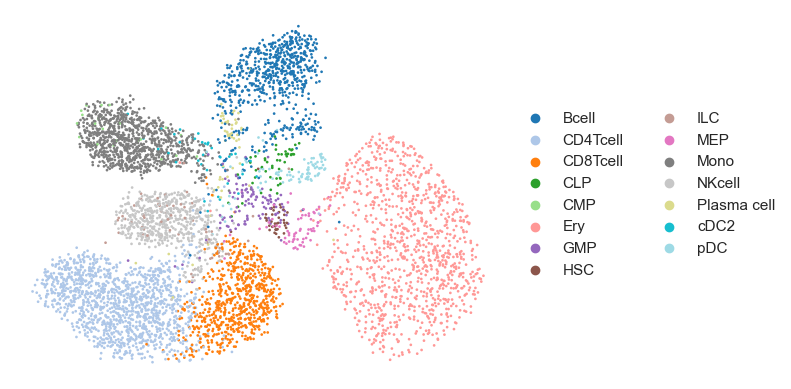

In [50]:
plt.show()

In [51]:
sc_commonDiffFeatures_adata_ground_truth_subset.uns["ground_truth_annotations_simplified_colors"] =['#38184C',  "#BDB0D9", "#82018F","#CA1ED4", "#DB90AA", "tab:gray", "#275974",'#D46A00','#3D5B9F',"#008F8C","tab:red","coral",'#C2EA8C',"#7ED9B7",'goldenrod']

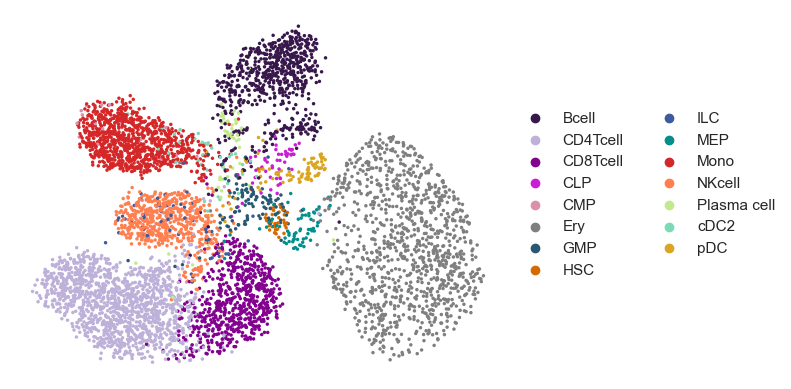

In [52]:
with plt.rc_context():
    sc.pl.umap(sc_commonDiffFeatures_adata_ground_truth_subset, color='ground_truth_annotations_simplified', show=False,size=25 , add_outline=False, frameon=False, title="")
    plt.savefig(figures_dir + "/UMAP_colored_ground_truth_matchingColor.pdf", bbox_inches="tight")
plt.show()

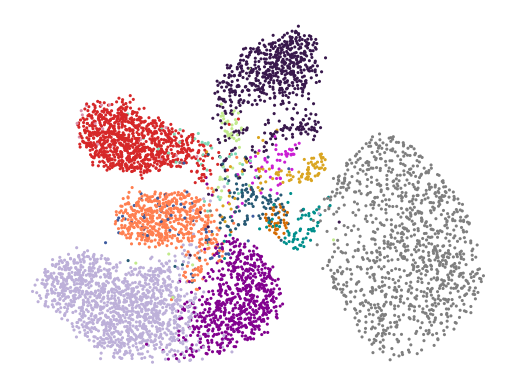

In [53]:
with plt.rc_context():
    sc.pl.umap(sc_commonDiffFeatures_adata_ground_truth_subset, color='ground_truth_annotations_simplified', show=False,size=20 , add_outline=False, frameon=False, title="" ,legend_loc=None)
    plt.savefig(figures_dir + "/UMAP_colored_ground_truth_matchingColor_noLeged.pdf", bbox_inches="tight")
    plt.show()

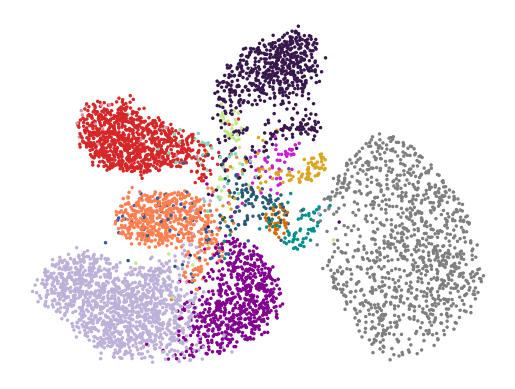

In [54]:
with plt.rc_context():
    sc.pl.umap(sc_commonDiffFeatures_adata_ground_truth_subset, color='ground_truth_annotations_simplified', show=False,size=25 , add_outline=False, frameon=False, title="" ,legend_loc=True)
    plt.savefig(figures_dir + "/UMAP_colored_ground_truth_matchingColor_noLeged_25pt.png", bbox_inches="tight", dpi=600)

plt.show()

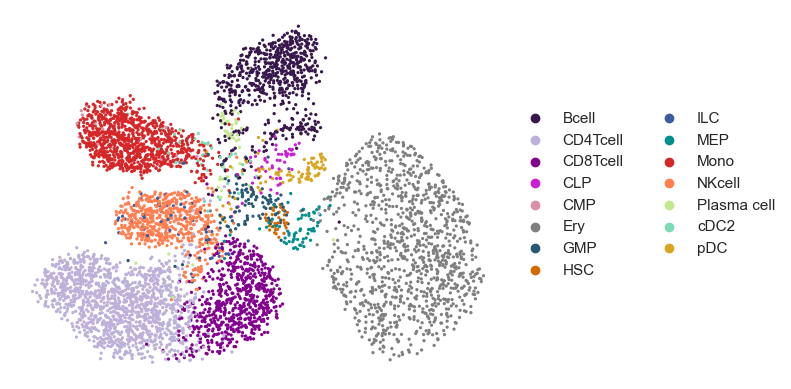

In [55]:
with plt.rc_context():
    sc.pl.umap(sc_commonDiffFeatures_adata_ground_truth_subset, color='ground_truth_annotations_simplified', show=False,size=22 , add_outline=False, frameon=False, title="" )
    plt.savefig(figures_dir + "/UMAP_colored_ground_truth_matchingColor_22pt.png", bbox_inches="tight", dpi=600)
plt.show()

In [56]:
plt.show()

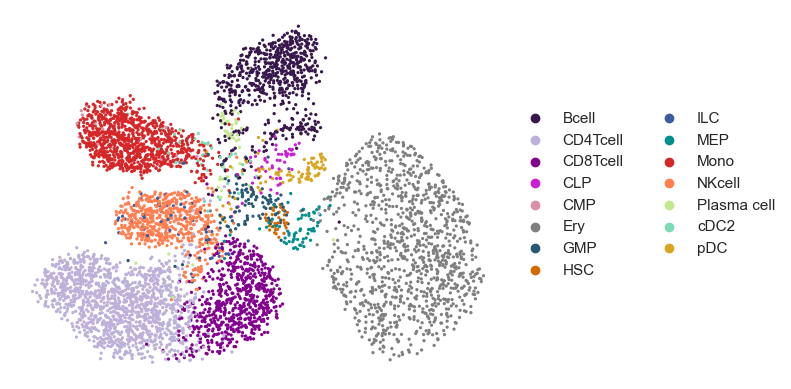

In [57]:
with plt.rc_context():
    sc.pl.umap(sc_commonDiffFeatures_adata_ground_truth_subset, color='ground_truth_annotations_simplified', show=False,size=22 , add_outline=False, frameon=False, title="" )
    plt.savefig(figures_dir + "/UMAP_colored_ground_truth_matchingColor_22pt.svg", bbox_inches="tight", dpi=600)
plt.show()

In [58]:
plt.show()